In [1]:
#Visualize the word embeddings we need
#Debugging finopt
#Visualize Samples from the model
import sys,os,glob
sys.path.append('../../')
import numpy as np
%matplotlib inline
import operator
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
#mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\\usepackage{amsfonts}','\\usepackage{amsmath}']
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['legend.fontsize']=20

from matplotlib import markers
from matplotlib import colors
clist = colors.cnames.keys()
mlist = markers.MarkerStyle().markers.keys()

#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from utils.misc import getConfigFile, readPickle, loadHDF5, createIfAbsent, saveHDF5
from optvaeutils.viz import getName
from sklearn.feature_extraction.text import TfidfTransformer
result   = {}

In [2]:
data = loadHDF5('../../expt/evalWikicorp/pl-2-finopt-ejacob.h5')
print data.keys()

[u'ejacob', u'ejacob_probs', u'ejacob_energy']


In [3]:
from datasets.load import loadDataset
import sys
sys.path.append('../../')
from optvaedatasets.load import loadDataset
DATA = 'wikicorp'

dataset = loadDataset(DATA)
print dataset.keys()
additional_attrs        = {}
tfidf                   = TfidfTransformer(norm=None)
tfidf.fit(dataset['train'])
#Get normalized idf vectors
additional_attrs['idf'] = tfidf.idf_

Loading linear matrices
Loading linear matrices
Read  3  objects
['mapIdx', 'data_type', 'dim_observations', 'train', 'vocabulary_singular', 'test', 'vocabulary', 'valid']


In [4]:
from optvaemodels.evaluate_vecs import clusterEmbeddings, evaluateWordVectors,getWordSimilarity
from optvaemodels.evaluate_vecs import expectedJacobian, conditionalJacobian

In [5]:
wordlist = ['artificial',
                  'intelligence',
                  'betterment',
                   'military',
                  'book',
                  'medicine',
                  'zen']

In [6]:
word_similarity=  getWordSimilarity(data['ejacob'], wordlist, dataset['vocabulary'],metric='cosine')
print word_similarity.keys()
for w in word_similarity:
    print w,':',','.join(word_similarity[w]),'\n'

['intelligence', 'zen', 'artificial', 'book', 'medicine', 'military']
intelligence : intelligence,espionage,colleagues,cia,directing,covert,interrogation 

zen : zen,dharma,buddhism,meditation,buddha,buddhist,karma 

artificial : artificial,artificially,solids,molecule,gravitational,evaporation,observable 

book : book,books,author,republished,written,paperback,reprinted 

medicine : medicine,physicians,physician,medical,pathology,medicines,vascular 

military : military,civilian,infantry,commanders,army,armys,forces 



In [7]:
TYPE = 'pl-2-finopt'
for f in glob.glob('../../expt/evalWikicorp-conditional/*'+TYPE+'.h5'):
    words= os.path.basename(f).replace('.h5','').split('-')
    print words
    print 'Word: ',words[0], ' Context: ',words[1]
    if words[0]=='fire':
        words[0] = 'fires'
    if words[0] not in dataset['vocabulary']:
        continue
    data2 = loadHDF5(f)
    res  = getWordSimilarity(data2['cjacob_energy'], [words[0]], dataset['vocabulary'] ,'cosine')
    print words[0],':',','.join(res[words[0]]),'\n'

['fires', 'burn', 'jacob', 'pl', '2', 'finopt']
Word:  fires  Context:  burn
fires : fires,roofs,ground,indoors,fuel,disperse,firefighters 

['crane', 'construction', 'jacob', 'pl', '2', 'finopt']
Word:  crane  Context:  construction
crane : crane,cranes,metallic,separated,embankment,semi,ground 

['bank', 'river', 'jacob', 'pl', '2', 'finopt']
Word:  bank  Context:  river
bank : bank,banks,settlement,communes,main,vineyards,dumping 

['bar', 'lawyer', 'jacob', 'pl', '2', 'finopt']
Word:  bar  Context:  lawyer
bar : bar,counsel,law,court,district,justices,admitted 

['crane', 'bird', 'jacob', 'pl', '2', 'finopt']
Word:  crane  Context:  bird
crane : crane,wetlands,tina,creek,lauderdale,river,frequented 

['bar', 'pub', 'jacob', 'pl', '2', 'finopt']
Word:  bar  Context:  pub
bar : bar,bars,pub,located,situated,centre,refurbished 

['park', 'car', 'jacob', 'pl', '2', 'finopt']
Word:  park  Context:  car
park : park,suburb,parks,located,tourist,racecourse,venue 

['bank', 'money', 'jacob'

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(data['ejacob_energy'])
print X_reduced.shape,pca.components_.shape

In [8]:
singular_vals = {}
singular_vals_prob = {}
singular_vals_pot = {}
for f in glob.glob('../../expt/evalWikicorp/*-ejacob.h5'):
    dd     = loadHDF5(f) 
    name =  os.path.basename(f).split('-eja')[0]
    ejacob = dd['ejacob']
    _,s,_  = np.linalg.svd(ejacob)
    singular_vals[name] = s
    #ejacob = dd['ejacob_probs']
    #_,s,_  = np.linalg.svd(ejacob)
    #singular_vals_prob[name] = s
    #ejacob = dd['ejacob_energy']
    #_,s,_  = np.linalg.svd(ejacob)
    #singular_vals_pot[name] = s
    print name

pl-2-finopt
pl-0-finopt
pl-0-none
pl-2-none


logsingular-jacob-wikicorp.pdf saved


/usr/local/pkg/python/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


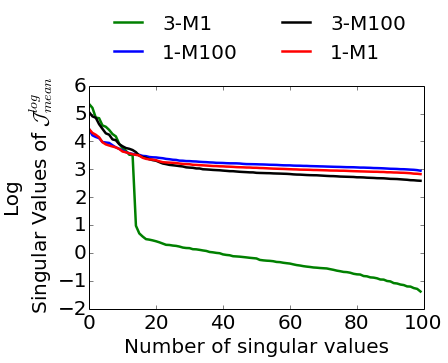

In [9]:
colorFinal = {}
colorFinal['1-M1']    = 'r'
colorFinal['1-M100']  = 'b'
colorFinal['3-M1']    =  'g'
colorFinal['3-M100']  =  'k'
markerFinal = {}
markerFinal['1-M1']   = 'p'
markerFinal['1-M100'] = 'd'
markerFinal['3-M1']   =  '<'
markerFinal['3-M100'] =  '*'

namemap= {}
namemap['pl-0-none'] = '1-M1'
namemap['pl-0-finopt'] = '1-M100'
namemap['pl-2-none'] = '3-M1'
namemap['pl-2-finopt'] = '3-M100'
plt.plot(figsize=(16,20))
for k in singular_vals:
    name = namemap[k]
    MARKER = markerFinal[name]
    COLOR  = colorFinal[name]
    plt.plot(np.sort(np.log(singular_vals[k]))[::-1],color=COLOR,label=name)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),ncol=2, frameon=False)
plt.ylabel('Log\n Singular Values of $\mathcal{J}^{log}_{mean}$')
plt.xlabel('Number of singular values')
fname = 'logsingular-jacob-wikicorp.pdf'
print fname,'saved'
#plt.savefig(fname,bbox_inches='tight')

In [ ]:
rcv2_singular_vals = {}
rcv2_singular_vals_prob = {}
rcv2_singular_vals_pot = {}
for f in glob.glob('../../expt/evalRCV2/*-ejacob.h5'):
    dd     = loadHDF5(f) 
    name =  os.path.basename(f).split('-eja')[0]
    ejacob = dd['ejacob']
    _,s,_  = np.linalg.svd(ejacob)
    rcv2_singular_vals[name] = s
    ejacob = dd['ejacob_probs']
    _,s,_  = np.linalg.svd(ejacob)
    rcv2_singular_vals_prob[name] = s
    ejacob = dd['ejacob_energy']
    _,s,_  = np.linalg.svd(ejacob)
    rcv2_singular_vals_pot[name] = s
    print name

In [ ]:

colorFinal = {}
colorFinal['1-M1']    = 'r'
colorFinal['1-M100']  = 'b'
colorFinal['3-M1']    =  'g'
colorFinal['3-M100']  =  'k'
markerFinal = {}
markerFinal['1-M1']   = 'p'
markerFinal['1-M100'] = 'd'
markerFinal['3-M1']   =  '<'
markerFinal['3-M100'] =  '*'

namemap= {}
namemap['pl-0-none'] = '1-M1'
namemap['pl-0-finopt'] = '1-M100'
namemap['pl-2-none'] = '3-M1'
namemap['pl-2-finopt'] = '3-M100'
plt.plot(figsize=(8,10))
for k in rcv2_singular_vals:
    name = namemap[k]
    MARKER = markerFinal[name]
    COLOR  = colorFinal[name]
    plt.plot(np.sort(np.log(rcv2_singular_vals[k]))[::-1],color=COLOR,label=name)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),ncol=2, frameon=False)
plt.ylabel('Log\n Singular Values of $\mathcal{J}^{log}_{mean}$')
plt.xlabel('Number of singular values')
fname = 'logsingular-jacob-rcv2_miao.pdf'
print fname,'saved'
plt.savefig(fname,bbox_inches='tight')